In [1]:
import sys
import seaborn 
import matplotlib
import seaborn
import sklearn

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
games = pd.read_csv("board_games.csv")

In [5]:
print(games.columns)
print(games.shape)
print(games.head())

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)
       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0  

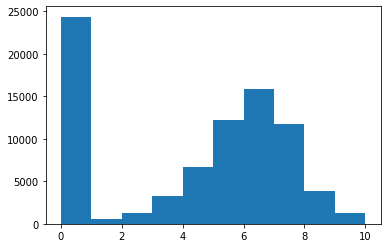

In [6]:
#make a histogram
plt.hist(games["average_rating"])
plt.show()

In [11]:
#print all games with zero score
print(games[games["average_rating"] == 0].iloc[0])
#print all games with zero score
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

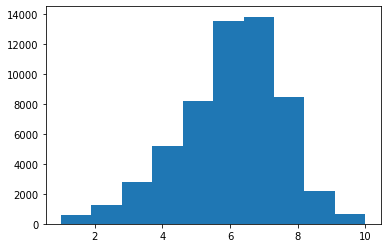

In [14]:
games = games[games["average_rating"]>0]

#remove any row with missing values
games = games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show()

In [15]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


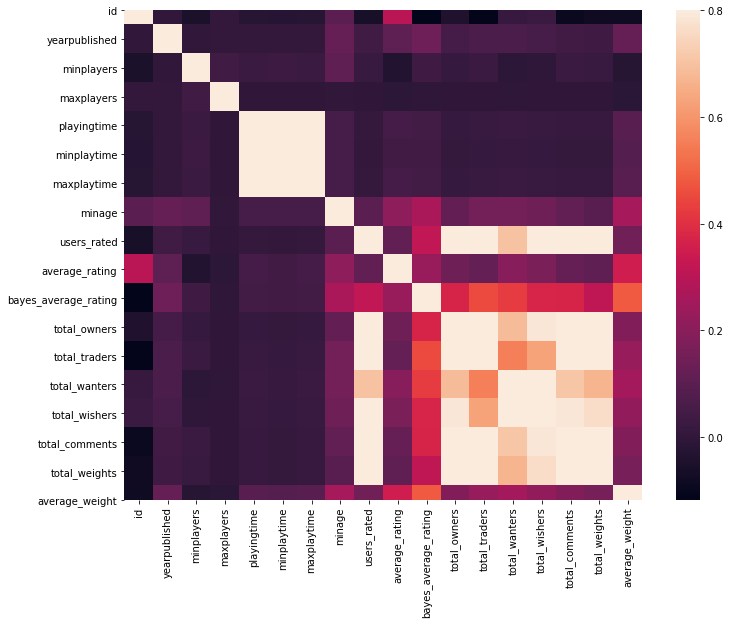

In [20]:
#we will remove ids as it give overfitting
#we will build corellation matrix
corrmxt = games.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmxt,vmax=0.8,square = True)
plt.show()

In [28]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in["bayes_average_rating","average_rating","id","type", "name"]]

target = "average_rating"

In [30]:
train = games.sample(frac = 0.8, random_state = 1)

#select anything not in training set and put in test set

test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

#fit the model of training data
lr.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#generate prediction on testing set
prediction = lr.predict(test[columns])

#comute error between avg_rating and prediction
mean_squared_error(prediction, test[target])

2.0788190326293243

In [23]:
plt.show()

In [35]:
# import random forest model
from sklearn.ensemble import RandomForestRegressor

#Intialize the model
rfr = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10,random_state = 1)

#fit the data
rfr.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [37]:
predictions = rfr.predict(test[columns])

mean_squared_error(predictions,test[target])

1.4458560046071653

test[columns].iloc[0]

In [38]:
rating = lr.predict(test[columns].iloc[0].values.reshape(1,-1))

In [39]:
rating_rfr=lr.predict(test[columns].iloc[0].values.reshape(1,-1))